In [2]:
import numpy as np
import matplotlib.pyplot as plt

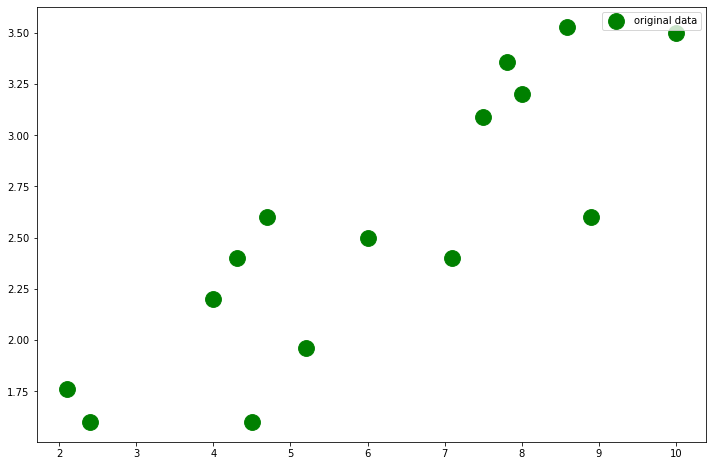

In [3]:
# x_train => features we use to train our model with; these are single-features
# y_train => target values
x_train = np.array([[4.7], [2.4], [7.5], [7.1], [4.3], [7.816], [8.9], [5.2], [8.59], [2.1], [8], [10], [4.5], [6], [4]], dtype=np.float32)
y_train = np.array([[2.6], [1.6], [3.09], [2.4], [2.4], [3.357], [2.6], [1.96], [3.53], [1.76], [3.2], [3.5], [1.6], [2.5], [2.2]], dtype=np.float32)

plt.figure(figsize=(12,8))
plt.scatter(x_train, y_train, label='original data', s=250, c='g')
plt.legend()
plt.show()

In [4]:
import torch

X_train = torch.from_numpy(x_train)
Y_train = torch.from_numpy(y_train)

print('requires_grad for X_train: ', X_train.requires_grad)
print('requires_grad for Y_train: ', Y_train.requires_grad)

requires_grad for X_train:  False
requires_grad for Y_train:  False


In [5]:
# we'll have just 1 neuron and only 1 x-feature and 1 y-output
input_size = 1
hidden_size = 1
output_size = 1

In [7]:
# w1 contains weights for our input to the neural network
# gradients calculated for w1 with respect to the loss function will be used to train the model
w1 = torch.rand(input_size,hidden_size,requires_grad=True)

# w2 widths correspond to the connection between hidden and output layer
w2 = torch.rand(hidden_size,output_size,requires_grad=True)

In [8]:
# size of step taken on model parameters toward the optimum
learning_rate = 1e-6

In [18]:
# count of epoches for our model to train
for iter in range(1,10000):
    # forward pass through the neural network - predictions
    # - using a single linear neuron with no activation function (because we want to learn a linear model)
    # - works with the current weights of our model parameters -> initialized with random values
    # - X_train * w1 * w2
    y_pred = X_train.mm(w1).mm(w2)

    # mean square error loss for linear regression
    loss = (y_pred - Y_train).pow(2).sum()

    # print the result of the MSE every 50th iteration -> should see the model converging to the optimum
    if iter % 50 == 0:
        print(iter, loss.item())

    # backward pass -> calculate gradients for our model parameters
    loss.backward()
 
    # tweaking model parameters
    with torch.no_grad():
        # gradients calculated for w1 and w2 with respect to the MSE loss function
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad
        w1.grad.zero_()
        w2.grad.zero_()

print('w1: ', w1)
print('w2: ', w2)

50 49.61520767211914
100 42.4762077331543
150 36.62277603149414
200 31.78813362121582
250 27.768728256225586
300 24.407360076904297
350 21.58131980895996
400 19.193927764892578
450 17.16835594177246
500 15.442883491516113
550 13.96764850616455
600 12.702180862426758
650 11.613393783569336
700 10.673955917358398
750 9.861272811889648
800 9.156569480895996
850 8.544157028198242
900 8.010869979858398
950 7.5455851554870605
1000 7.138930320739746
1050 6.782923221588135
1100 6.470799922943115
1150 6.196743965148926
1200 5.955809593200684
1250 5.743727684020996
1300 5.556826114654541
1350 5.3919453620910645
1400 5.2463297843933105
1450 5.117621898651123
1500 5.003748893737793
1550 4.902917861938477
1600 4.813570976257324
1650 4.734340667724609
1700 4.664031982421875
1750 4.601594924926758
1800 4.5461201667785645
1850 4.496807098388672
1900 4.452944278717041
1950 4.413907527923584
2000 4.379148483276367
2050 4.348186016082764
2100 4.320598125457764
2150 4.296000003814697
2200 4.27406358718872

In [19]:
# evaluate model by running a few predictions
x_train_tensor = torch.from_numpy(x_train)
predicted_in_tensor = x_train_tensor.mm(w1).mm(w2)

predicted = predicted_in_tensor.detach().numpy()
predicted

array([[1.8643656 ],
       [0.95201653],
       [2.9750516 ],
       [2.8163822 ],
       [1.7056963 ],
       [3.1004007 ],
       [3.5303946 ],
       [2.0627024 ],
       [3.4074259 ],
       [0.8330144 ],
       [3.1733885 ],
       [3.9667354 ],
       [1.785031  ],
       [2.3800414 ],
       [1.5866942 ]], dtype=float32)

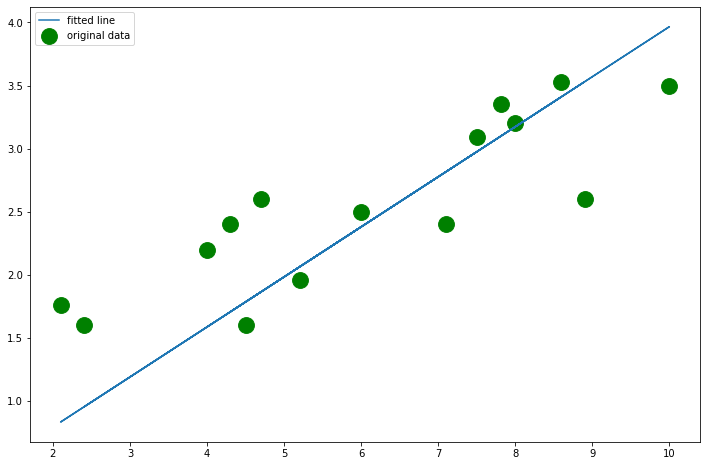

In [20]:
# linear model -> predicted values should be in the form of a straight line -> found using linear regression on a simple neural network
plt.figure(figsize=(12,8))
plt.scatter(x_train, y_train, label = 'original data', s=250, c='g')
plt.plot(x_train, predicted, label='fitted line')

plt.legend()
plt.show()